In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
# from sklearn.compose import make_column_transformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, Callback
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.metrics as metrics
from scikeras.wrappers import KerasClassifier
from sklearn.datasets import make_classification
import time
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, make_scorer, f1_score, recall_score, balanced_accuracy_score,
matthews_corrcoef, jaccard_score, average_precision_score, roc_auc_score, accuracy_score)
from tabulate import tabulate
from sklearn.base import ClassifierMixin, BaseEstimator
import winsound
import random
import os
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
X_nontest, X_test, y_nontest, y_test = train_test_split(X, y, test_size = 0.25)
X_train, X_val, y_train, y_val = train_test_split(X_nontest, y_nontest, test_size = 0.3)

In [4]:
df = pd.DataFrame(X)
df['TARGET'] = y
df.nunique()

0         456
1         479
2         522
3         539
4         474
5         537
6         537
7         542
8         432
9         499
10        540
11        519
12        533
13        528
14        547
15        541
16        533
17        507
18        498
19        545
20        457
21        511
22        514
23        544
24        411
25        529
26        539
27        492
28        500
29        535
TARGET      2
dtype: int64

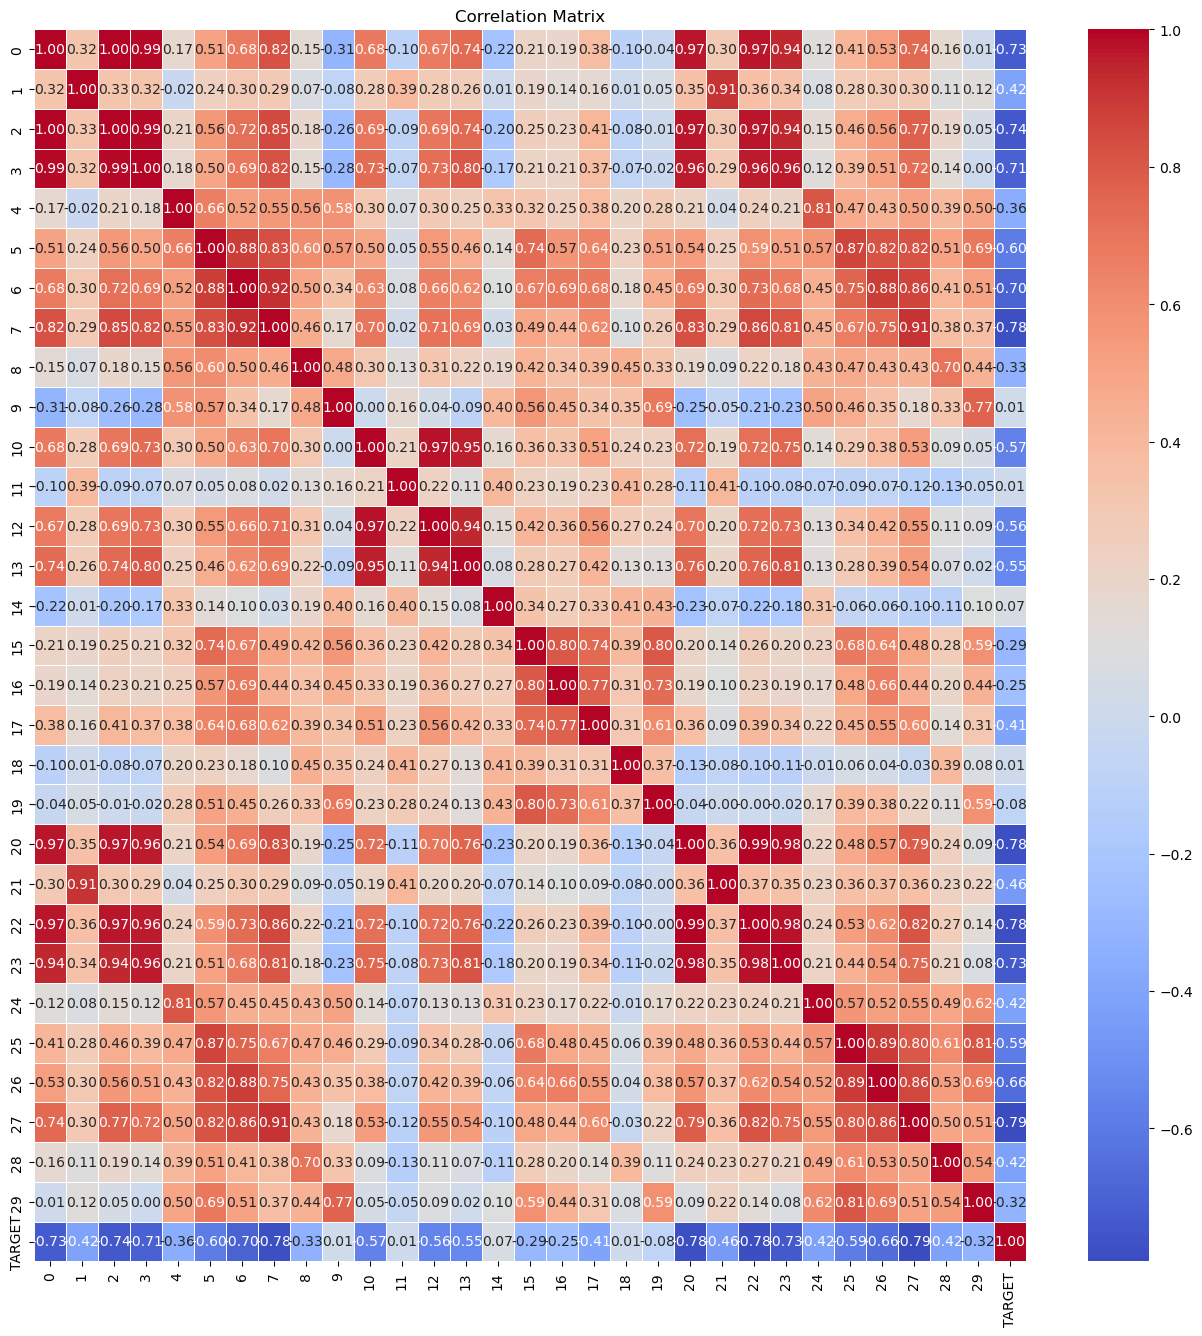

TARGET    1.000000
14        0.067016
9         0.012838
11        0.008303
18        0.006522
19       -0.077972
16       -0.253730
15       -0.292999
29       -0.323872
8        -0.330499
4        -0.358560
17       -0.408042
1        -0.415185
28       -0.416294
24       -0.421465
21       -0.456903
13       -0.548236
12       -0.556141
10       -0.567134
25       -0.590998
5        -0.596534
26       -0.659610
6        -0.696360
3        -0.708984
0        -0.730029
23       -0.733825
2        -0.742636
20       -0.776454
7        -0.776614
22       -0.782914
27       -0.793566
Name: TARGET, dtype: float64


In [5]:
correlation_matrix = df.corr(method='pearson')
correlation_with_target = correlation_matrix['TARGET'].sort_values(ascending=False)

# Plotting a heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Display correlation with the target
print(correlation_with_target)

In [6]:
X_train.shape, X_val.shape, X_test.shape

((298, 30), (128, 30), (143, 30))

In [7]:
y.sum()/len(y)

0.6274165202108963

In [8]:
y_train.sum()/len(y_train), y_val.sum()/len(y_val), y_test.sum()/len(y_test)

(0.6241610738255033, 0.6171875, 0.6433566433566433)

In [9]:
model = Sequential([
    Dense(50, activation = 'ReLU', input_shape = [X.shape[1]]),
    Dense(50, activation = 'ReLU'),
    Dense(1, activation = 'sigmoid')
])
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 15, restore_best_weights = True)
history = model.fit(X_train, y_train, epochs = 200, batch_size = len(X_train), validation_data = [X_val, y_val], callbacks = [early_stopping])

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 13.0497 - accuracy: 0.3758 - val_loss: 130.0050 - val_accuracy: 0.6172
Epoch 2/200
1/1 [==============================] - 0s 66ms/step - loss: 126.6504 - accuracy: 0.6242 - val_loss: 89.9436 - val_accuracy: 0.6172
Epoch 3/200
1/1 [==============================] - 0s 81ms/step - loss: 87.7419 - accuracy: 0.6242 - val_loss: 21.2305 - val_accuracy: 0.6172
Epoch 4/200
1/1 [==============================] - 0s 65ms/step - loss: 21.9052 - accuracy: 0.6242 - val_loss: 36.1872 - val_accuracy: 0.3828
Epoch 5/200
1/1 [==============================] - 0s 66ms/step - loss: 37.0479 - accuracy: 0.3758 - val_loss: 55.4537 - val_accuracy: 0.3828
Epoch 6/200
1/1 [==============================] - 0s 64ms/step - loss: 56.6601 - accuracy: 0.3758 - val_loss: 57.3369 - val_accuracy: 0.3828
Epoch 7/200
1/1 [==============================] - 0s 63ms/step - loss: 58.5756 - accuracy: 0.3758 - val_loss: 47.3735 - val_accuracy: 0.3828
Epoch 

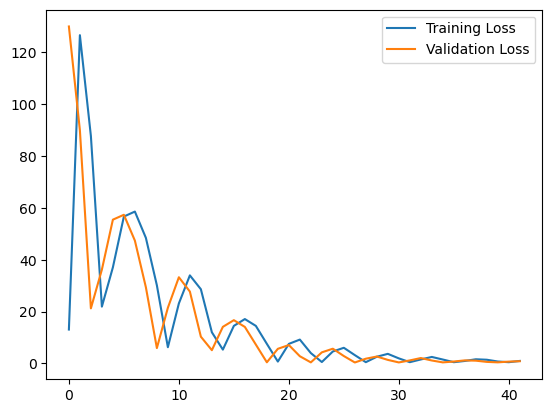

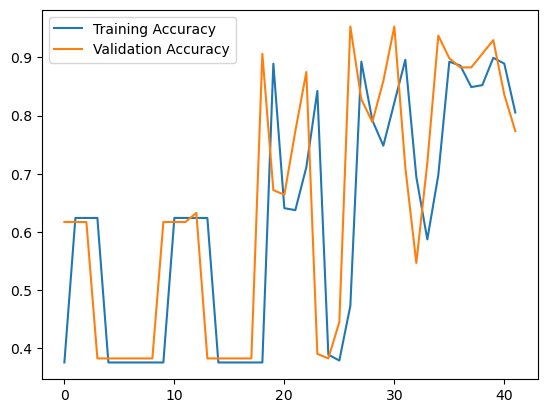

In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation Loss')
plt.legend()
plt.show()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label = 'Training Accuracy')
plt.plot(val_accuracy, label = 'Validation Accuracy')
plt.legend()
plt.show()

In [11]:
y_pred_raw = model.predict(X_train)
# threshold = 0.5  # Adjust the threshold as needed
y_pred = (y_pred_raw > 0.5).astype(int).reshape(-1)
print(sum(y_train == y_pred))
print(len(y_train))
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)
cm_train = confusion_matrix(y_train, y_pred)
class_names = ["Class 0", "Class 1"]
cm_table_train = tabulate(cm_train, headers = class_names, tablefmt = 'grid')
print(cm_table_train)

10/10 [==============================] - 0s 3ms/step
266
298
0.8926174496644296
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|        91 |        21 |
+-----------+-----------+
|        11 |       175 |
+-----------+-----------+


In [12]:
y_train

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [13]:
y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [16]:
y_pred_raw = model.predict(X_val)
# threshold = 0.5  # Adjust the threshold as needed
y_pred = (y_pred_raw > 0.5).astype(int).reshape(-1)
print(sum(y_val == y_pred))
print(len(y_val))
accuracy = accuracy_score(y_val, y_pred)
print(accuracy)
cm_val = confusion_matrix(y_val, y_pred)
class_names = ["Class 0", "Class 1"]
cm_table_val = tabulate(cm_val, headers = class_names, tablefmt = 'grid')
print(cm_table_val)

4/4 [==============================] - 0s 4ms/step
122
128
0.953125
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|        45 |         4 |
+-----------+-----------+
|         2 |        77 |
+-----------+-----------+


In [14]:
y_pred_raw = model.predict(X_test)
# threshold = 0.5  # Adjust the threshold as needed
y_pred = (y_pred_raw > 0.5).astype(int).reshape(-1)
print(sum(y_test == y_pred))
print(len(y_test))
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
cm_test = confusion_matrix(y_test, y_pred)
class_names = ["Class 0", "Class 1"]
cm_table_test = tabulate(cm_test, headers = class_names, tablefmt = 'grid')
print(cm_table_test)

5/5 [==============================] - 0s 3ms/step
130
143
0.9090909090909091
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|        42 |         9 |
+-----------+-----------+
|         4 |        88 |
+-----------+-----------+


In [15]:
y_pred

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])